In [1]:
import pandas as pd
import seaborn as sns
sns.set()
#pd.options.plotting.backend = "plotly"
import re
df = pd.read_csv("ssh_results.csv", on_bad_lines="warn")
df.index = pd.to_datetime(df.timestamp)
df = df.dropna()
df = df[df.index > "2023-11-27 00:00:00"]
df = df[df.output.str.startswith("2023")]
df

,IP,time,output,timestamp
timestamp,,,,
2023-11-27 00:01:40.162015,130.216.216.179,10.879876,2023-11-26 11:00:02.717587: I tensorflow/core/...,2023-11-27 00:01:40.162015
2023-11-27 00:01:40.162015,130.216.216.196,10.732125,2023-11-27 00:00:02.602769: I tensorflow/core/...,2023-11-27 00:01:40.162015
2023-11-27 00:01:40.162015,130.216.217.65,98.218867,2023-11-26 11:00:02.710293: I tensorflow/core/...,2023-11-27 00:01:40.162015
2023-11-27 00:01:40.162015,130.216.217.127,10.951436,2023-11-27 00:00:02.690236: I tensorflow/core/...,2023-11-27 00:01:40.162015
2023-11-27 00:01:40.162015,130.216.216.117,11.006594,2023-11-27 00:00:02.862118: I tensorflow/core/...,2023-11-27 00:01:40.162015
...,...,...,...,...
2023-11-27 14:56:40.271489,130.216.216.196,10.786567,2023-11-27 14:55:02.725038: I tensorflow/core/...,2023-11-27 14:56:40.271489
2023-11-27 14:56:40.271489,130.216.217.65,97.950522,2023-11-27 01:55:02.657736: I tensorflow/core/...,2023-11-27 14:56:40.271489
2023-11-27 14:56:40.271489,130.216.217.127,10.880647,2023-11-27 14:55:02.756774: I tensorflow/core/...,2023-11-27 14:56:40.271489


In [2]:
# Extract some metrics from the output
def parse_time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split('m'))
    return minutes * 60 + seconds
df["nvidia-smi_time"] = df.output.str.extract(r'real\s+(.+)s')[0].apply(parse_time_to_seconds)
df["tf_devices_time"] = df.output.str.extract(r'Took (\d+)s').astype(int)
df["serials"] = df.output.str.findall(r'Serial Number\s*:\s*([^:]+)\n').apply(lambda s: ", ".join(s))
df["product names"] = df.output.str.findall("^    Product Name\s*:\s*([^:]+)$", re.MULTILINE).apply(lambda s: ", ".join(s))
df["bitshift"] = (df["product names"] == "Unknown Error")
df["persistence"] = df.output.str.extract(r'Persistence Mode\s*:\s*(.+)\n')
df["tf_detected_GPUs"] = df.output.str.findall(r"physical_device:(GPU:\d)', device_type='GPU'").str.len()
df

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,bitshift,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,,
2023-11-27 00:01:40.162015,130.216.216.179,10.879876,2023-11-26 11:00:02.717587: I tensorflow/core/...,2023-11-27 00:01:40.162015,0.122,0,1322122007252,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-27 00:01:40.162015,130.216.216.196,10.732125,2023-11-27 00:00:02.602769: I tensorflow/core/...,2023-11-27 00:01:40.162015,0.103,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-27 00:01:40.162015,130.216.217.65,98.218867,2023-11-26 11:00:02.710293: I tensorflow/core/...,2023-11-27 00:01:40.162015,87.475,72,1322822261453,Unknown Error,True,Enabled,0
2023-11-27 00:01:40.162015,130.216.217.127,10.951436,2023-11-27 00:00:02.690236: I tensorflow/core/...,2023-11-27 00:01:40.162015,0.228,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
2023-11-27 00:01:40.162015,130.216.216.117,11.006594,2023-11-27 00:00:02.862118: I tensorflow/core/...,2023-11-27 00:01:40.162015,0.272,0,"1323022014403, 1323022014449","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 14:56:40.271489,130.216.216.196,10.786567,2023-11-27 14:55:02.725038: I tensorflow/core/...,2023-11-27 14:56:40.271489,0.167,0,1652422032676,NVIDIA A100 80GB PCIe,False,Enabled,1
2023-11-27 14:56:40.271489,130.216.217.65,97.950522,2023-11-27 01:55:02.657736: I tensorflow/core/...,2023-11-27 14:56:40.271489,87.380,90,1322822261453,Unknown Error,True,Enabled,0
2023-11-27 14:56:40.271489,130.216.217.127,10.880647,2023-11-27 14:55:02.756774: I tensorflow/core/...,2023-11-27 14:56:40.271489,0.209,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",False,Enabled,2


In [3]:
df.persistence.value_counts()

Enabled    824
Name: persistence, dtype: int64

In [4]:
df.groupby("serials").resample("D").bitshift.mean()

serials                       timestamp 
1322122007252                 2023-11-27    0.000000
1322822261453                 2023-11-27    0.546763
1323022014403, 1323022014449  2023-11-27    0.000000
1323022015019                 2023-11-27    0.634146
1323222021113                 2023-11-27    0.666667
1652422032676                 2023-11-27    0.000000
1652422032681, 1322122007042  2023-11-27    0.000000
Name: bitshift, dtype: float64

In [5]:
df.groupby("serials").bitshift.mean()

serials
1322122007252                   0.000000
1322822261453                   0.546763
1323022014403, 1323022014449    0.000000
1323022015019                   0.634146
1323222021113                   0.666667
1652422032676                   0.000000
1652422032681, 1322122007042    0.000000
Name: bitshift, dtype: float64

In [6]:
df.IP[df.tf_detected_GPUs == 2].value_counts()

130.216.217.127    138
130.216.216.117    138
Name: IP, dtype: int64

In [7]:
#df.serials = df.serials + df.bitshift.apply(lambda b: " (bitshift)" if b else "")

serials
1322122007252                   Axes(0.125,0.2;0.775x0.68)
1322822261453                   Axes(0.125,0.2;0.775x0.68)
1323022014403, 1323022014449    Axes(0.125,0.2;0.775x0.68)
1323022015019                   Axes(0.125,0.2;0.775x0.68)
1323222021113                   Axes(0.125,0.2;0.775x0.68)
1652422032676                   Axes(0.125,0.2;0.775x0.68)
1652422032681, 1322122007042    Axes(0.125,0.2;0.775x0.68)
Name: nvidia-smi_time, dtype: object

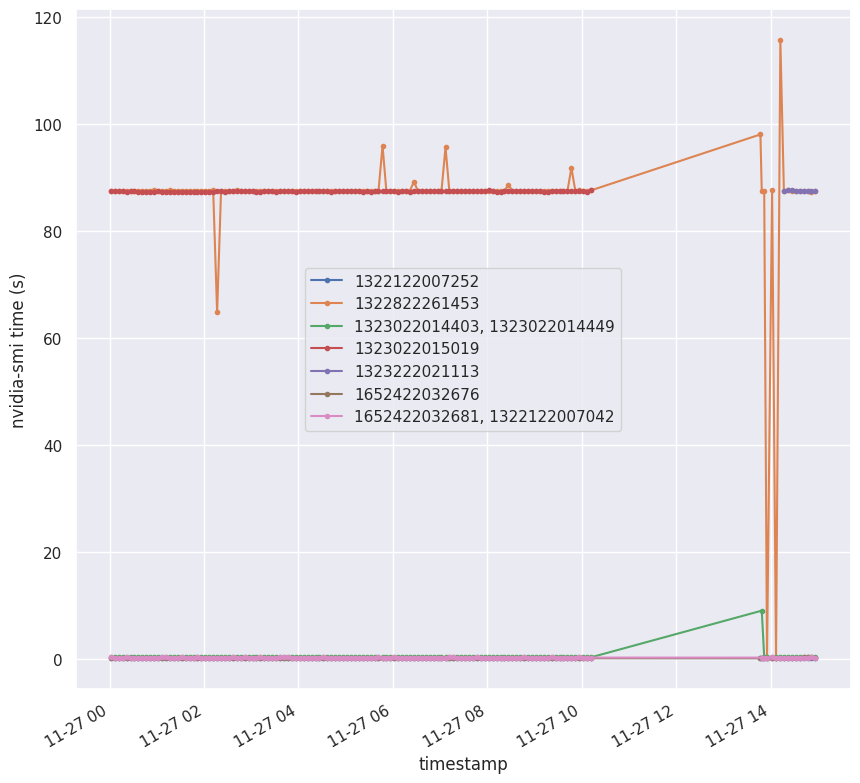

In [8]:
df.groupby("serials")["nvidia-smi_time"].plot(legend=True, figsize=(10,10), style=".-", ylabel="nvidia-smi time (s)")

In [9]:
df.groupby("serials")["nvidia-smi_time"].describe()

,count,mean,std,min,25%,50%,75%,max
serials,,,,,,,,
1322122007252,139.0,0.118295,0.002982,0.110,0.11600,0.118,0.1200,0.129
1322822261453,139.0,86.474619,11.002211,0.113,87.41800,87.437,87.4775,115.628
"1323022014403, 1323022014449",138.0,0.336283,0.741288,0.262,0.26900,0.272,0.2770,8.981
1323022015019,123.0,87.349033,0.049038,87.251,87.31800,87.342,87.3790,87.593
1323222021113,9.0,87.426000,0.075048,87.336,87.37600,87.400,87.4940,87.544
1652422032676,139.0,0.106561,0.023670,0.091,0.10200,0.103,0.1040,0.268
"1652422032681, 1322122007042",138.0,0.215246,0.008071,0.204,0.21025,0.212,0.2150,0.255


In [10]:
df.to_excel("results.xlsx")